# Calculating Phi slides
Following along [227 slides](https://journals.plos.org/ploscompbiol/article/file?id=10.1371/journal.pcbi.1006343.s001&type=supplementary). (but perhaps implementing differently)

In [1]:
import numpy as np
import pandas as pd

import pyphi.data_models as dm  # Prototype code
import networkx as nx
from pyphi.convert import sbs2sbn, sbn2sbs      

import pyphi
import numpy as np
from pprint import pprint

# An example network
#### Slide 18

Self-loops do not plot.  Actual self-edges = [('D', 'D')]


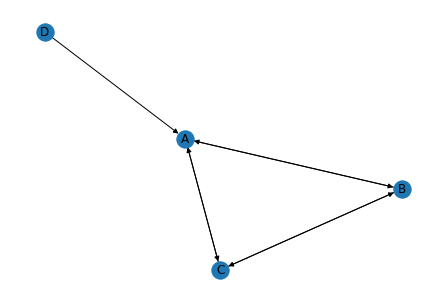

In [2]:
edges = [(0,1),
         (0,2),
         (1,0),
         (1,2),
         (2,0),
         (2,1),
         (3,0),
         (3,3)
        ]
net = dm.Net(edges=edges, SpN=2)
net.draw()
print(f'Self-loops do not plot.  Actual self-edges = {[(i,j) for i,j in net.graph.edges() if i==j]}')

##### Specify operation associated with each node
Default is or_func so ignore those

In [3]:
net.get_node('B').func = dm.and_func
net.get_node('C').func = dm.xor_func
[(n.label, n.func) for n in net.nodes]

[('A', <function pyphi.data_models.noop_func(*args)>),
 ('B', <function pyphi.data_models.and_func(*args)>),
 ('C', <function pyphi.data_models.xor_func(*args)>),
 ('D', <function pyphi.data_models.noop_func(*args)>)]

In [4]:
states = dm.States(net=net)
df = states.tpm(backwards=True)
df.style.applymap(dm.hilite_pos)

"Candidate System" = ['A', 'B', 'C', 'D']


,0000,1000,0100,1100,0010,1010,0110,1110,0001,1001,0101,1101,0011,1011,0111,1111
0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
0100,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0010,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1010,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
0110,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1110,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
0001,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


*above matches matrix on slide 23*

# Fix background conditions. Marginalize out background.

In [5]:
cond_D0='...0' # conditioned on D=0 (background condition)
cand_sys = states.tpm(condition=cond_D0, backwards=True)
cand_sys.style.applymap(dm.hilite_pos)

"Candidate System" = ['A', 'B', 'C']


,000,100,010,110,001,101,011,111
000,1,0,0,0,0,0,0,0
100,0,0,0,0,0,1,0,0
010,0,0,0,0,1,0,0,0
110,0,1,0,0,0,0,0,0
001,1,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,1
011,0,0,0,0,1,0,0,0
111,0,0,0,1,0,0,0,0


*above matches right side of slide 39*

### Explore (will differ from slides)
non-deterministic, non-binary nodes, non-square TPM (remove columns 010,011)

# Cause-effect repertoires (42)

In [6]:
mechanism = list('ABC')
set(net.candidate_mechanisms(mechanism))

{('A',), ('B',), ('B', 'A'), ('B', 'C'), ('B', 'C', 'A'), ('C',), ('C', 'A')}

slide 57

In [7]:
cand_sys.loc[['100']]#.T.style.bar(color='#d65f5f')
 # effect repertoire of ABC in state 100

,000,100,010,110,001,101,011,111
100,0,0,0,0,0,1,0,0


slide 61

In [8]:
purview=list('BC')

In [9]:
list(net.graph)

['A', 'B', 'C', 'D']